<h1>German Traffic Sign Classifier</h1>
<h3>The program classifies the traffic signs images into 43 different classes using TensorFlow</h3>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pickle
import csv
import os
import random
import cv2
from sklearn.utils import shuffle
import skimage.morphology as morp
from skimage.filters import rank
from tensorflow.contrib.layers import flatten
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter.filedialog import askopenfilename
from PIL import Image

<h3> We now load the dataset into the program using pickle library from python</h3>

In [2]:
#Loading the data into the program
training_file = "train.p" #training dataset
validation_file= "valid.p" #validation dataset
testing_file = "test.p" #testing dataset

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#loading the traffic signs classes    
signs = []
with open('signnames.csv', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter=',')
    next(signnames,None)
    for row in signnames:
        signs.append(row[1])
    csvfile.close()

#loading images and labels into the arrays
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

X_train, y_train = shuffle(X_train, y_train) #shuffling the training set for randomness

print("No. of training examples: "+str(y_train.size))
print("No. of training examples: "+str(y_valid.size))
print("No. of training examples: "+str(y_test.size))
    

No. of training examples: 34799
No. of training examples: 4410
No. of training examples: 12630


<h3> We preprocess the images into grayscale and normalize them for better result</h3>

In [3]:
def gray_scale(image):  
    
    image = image.astype(np.float32)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def normalize_images(image):
    image = np.divide(image,255)
    return image

In [4]:
gray_train =  list(map(gray_scale, X_train))

n_training = X_train.shape
normalized_images = np.zeros((n_training[0], n_training[1], n_training[2]))
for i, img in enumerate(gray_train):
    normalized_images[i] = normalize_images(img)
final_gray_train = np.asarray(normalized_images)  #final input for training in the model

gray_valid = list(map(gray_scale,X_valid))
n_valid = X_valid.shape
normalized_valid = np.zeros((n_valid[0], n_valid[1], n_valid[2]))
for i, img in enumerate(gray_valid):
    normalized_valid[i] = normalize_images(img)
final_gray_valid = np.asarray(normalized_valid)

gray_test =  list(map(gray_scale, X_test))
n_test = X_test.shape
normalized_test = np.zeros((n_test[0], n_test[1], n_test[2]))
for i, img in enumerate(gray_test):
    normalized_test[i] = normalize_images(img)

final_gray_test = np.asarray(normalized_test)

<h3> The convolutional neural network has been created using keras library. The model built for this program has one input layer, 6 hidden layers and one output layer. Since, the input images are of size 32x32, the total input required for the network is 1024. Hence, the input layer has 1024 nodes. Also, the number of traffic sign classes is 43. Therefore, the output layer has 43 nodes. </h3> 
<h3> To minimize the loss function, we have used Adam Optimizer, and the metrics used is accuracy</h3>
<h3> The number of epochs for training is 20, and the batch size of images during training is 100</h3>

In [5]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(32, 32)),
keras.layers.Dense(2048, activation=tf.nn.relu),
keras.layers.Dense(1024, activation=tf.nn.relu),
keras.layers.Dense(512, activation=tf.nn.relu),
keras.layers.Dense(256, activation=tf.nn.relu),
keras.layers.Dense(128, activation=tf.nn.relu),
keras.layers.Dense(64, activation=tf.nn.relu),
keras.layers.Dense(43, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
model.fit(final_gray_train, y_train, epochs=20,batch_size=100) #start training the network
    
    
    

Epoch 1/20
34799/34799 [==============================] - 9s 268us/step - loss: 2.5239 - acc: 0.2981 3s - l
Epoch 2/20
34799/34799 [==============================] - 5s 152us/step - loss: 1.3298 - acc: 0.5812
Epoch 3/20
34799/34799 [==============================] - 4s 118us/step - loss: 0.8412 - acc: 0.7378
Epoch 4/20
34799/34799 [==============================] - 4s 121us/step - loss: 0.6263 - acc: 0.8044
Epoch 5/20
34799/34799 [==============================] - 5s 137us/step - loss: 0.4923 - acc: 0.8459
Epoch 6/20
34799/34799 [==============================] - 4s 123us/step - loss: 0.4149 - acc: 0.8707
Epoch 7/20
34799/34799 [==============================] - 4s 118us/step - loss: 0.3395 - acc: 0.8942
Epoch 8/20
34799/34799 [==============================] - 4s 117us/step - loss: 0.3182 - acc: 0.8996
Epoch 9/20
34799/34799 [==============================] - 4s 120us/step - loss: 0.2784 - acc: 0.9123
Epoch 10/20
34799/34799 [==============================] - 4s 117us/step - loss: 0.2

In [6]:
valid_loss,valid_acc = model.evaluate(final_gray_valid,y_valid) #start evaluation by validation set
print("Validation set accuracy: ",str(valid_acc))
test_loss,test_acc = model.evaluate(final_gray_test,y_test) #start evaluation by testing set
print("\nTesting set accuracy: ",str(test_acc))
    

4410/4410 [==============================] - 0s 87us/step
Validation set accuracy:  0.7804988662266678
12630/12630 [==============================] - 1s 73us/step

Testing set accuracy:  0.7933491686743965


<h3> We created a interface for testing random images through the program using tkinter library</h3>

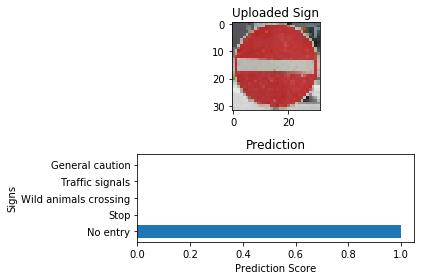

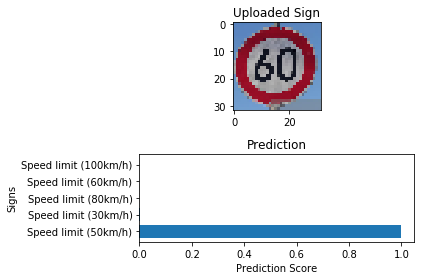

In [14]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import numpy as np
from PIL import Image

def predictImage(filename):
    test_image = []
    uploaded_img = cv2.imread(filename)
    uploaded_img = cv2.resize(uploaded_img, (32,32))
    uploaded_img = cv2.cvtColor(uploaded_img, cv2.COLOR_BGR2RGB)
    test_image.append(uploaded_img)
    finalnewtest = np.asarray(test_image)
    finalnewtest = list(map(gray_scale, finalnewtest))
    finalnewtest = np.asarray(finalnewtest)
    n_testimg = finalnewtest.shape
    normalized_testimg = np.zeros((n_testimg[0], n_testimg[1], n_testimg[2]))
    for i, img in enumerate(finalnewtest):
        normalized_testimg[i] = normalize_images(img)
    finalnewtest2 = np.asarray(normalized_testimg)
    p = model.predict(finalnewtest2)
    s = np.argsort(p[0])[::-1]
    p_values = [None]*5
    p_labels = [None]*5
    count = 0
    for i in s:
        p_values[count] = p[0][i]
        p_labels[count] = signs[i]
        count +=1
        if count == 5:
            break
    
    plt.subplot(2,1,1)
    plt.title("Uploaded Sign")
    plt.imshow(uploaded_img)
    plt.subplot(2,1,2)
    plt.barh(p_labels,p_values)
    plt.ylabel('Signs')
    plt.xlabel('Prediction Score')
    plt.title("Prediction")
    plt.tight_layout()
    plt.show()
    return signs[np.argmax(p[0])],p_values,p_labels


def clearImage():
    global imgLabel
    global predictLabel
    global clearButton
    global frame
    global p_label
    frame.pack_forget()
    imgLabel.pack_forget()
    predictLabel.pack_forget()
    clearButton.pack_forget()
    for i in range(4):
        p_label[i].pack_forget()
        
def processImage():
    global sess
    global predictLabel
    global clearButton
    global top
    global filename
    global p_label
    final_result,p_values,p_labels = predictImage(filename)
    result = "Prediction for above image: "+final_result+"\n Here are the top four predictions with their scores"
    predictLabel = tk.Label(top, text = result,font=('Seogue UI',15))
    predictLabel.pack(pady=10)
    p_label = [None]*5
    for i in range(4):
        p_label[i] = tk.Label(top, text = p_labels[i]+": "+str(p_values[i]))
        p_label[i].pack(pady = 5)
    
    
    clearButton = tk.Button(top, text = "Clear Image",command = clearImage)
    clearButton.pack(pady=10)
    
def uploadImage():
    global top
    global imgLabel
    global filename
    global frame
    filename = askopenfilename()
    img = tk.PhotoImage(file = filename)
    img = img.zoom(15)
    img = img.subsample(72)
    
    frame = tk.Frame(top, width=150, height=150, background='white')
    frame.pack_propagate(0)    
    frame.pack(pady = 10)
    imgLabel = tk.Label(frame, image = img)
    imgLabel.img = img
    imgLabel.pack(pady = 10)
    processImage()
    
    
def startGUI():
    global top
    top = tk.Tk()
    top.title("German Traffic Signs Classifier")
    top.geometry("800x550")
    top.resizable(0,0)

    title_label = tk.Label(top, text = "German Traffic Signs Classifier", font=('Seogue UI',20))
    title_label.pack(pady = 5)

    descripLabel = tk.Label(top, text = "Please upload an image to test the program",font = ('Seogue UI',15))
    descripLabel.pack(pady = 10)

    uploadButton = tk.Button(top, text = 'Upload a test image', command = uploadImage)
    uploadButton.pack(pady = 10)
    top.mainloop()

startGUI()